# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

# Reading  the data

In [2]:
df=pd.read_csv('../input/diverse-algorithm-analysis-dataset-daad/Pokemon_categorical.csv')

# Understanding the data

In [3]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

**The dataset contains too many columns that we do not need.
So it is better to create a new dataset with only the necessary columns**

In [4]:
df2=df[['name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'generation', 'is_legendary']]

In [5]:
df2.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,45,49,49,65,65,45,1,0
1,Ivysaur,grass,poison,60,62,63,80,80,60,1,0
2,Venusaur,grass,poison,80,100,123,122,120,80,1,0
3,Charmander,fire,NaN,39,52,43,60,50,65,1,0
4,Charmeleon,fire,NaN,58,64,58,80,65,80,1,0


In [6]:
df2.columns

Index(['name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'generation', 'is_legendary'],
      dtype='object')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          801 non-null    object
 1   type1         801 non-null    object
 2   type2         417 non-null    object
 3   hp            801 non-null    int64 
 4   attack        801 non-null    int64 
 5   defense       801 non-null    int64 
 6   sp_attack     801 non-null    int64 
 7   sp_defense    801 non-null    int64 
 8   speed         801 non-null    int64 
 9   generation    801 non-null    int64 
 10  is_legendary  801 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 69.0+ KB


In [8]:
df2.describe()

,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,3.690387,0.087391
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.930420,0.282583
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,7.000000,1.000000


In [9]:
df2.corr()

,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
hp,1.000000,0.410616,0.242378,0.365973,0.366971,0.160760,0.074065,0.308405
attack,0.410616,1.000000,0.468915,0.368154,0.265836,0.352703,0.101375,0.303295
defense,0.242378,0.468915,1.000000,0.241882,0.526348,0.007934,0.057603,0.265587
sp_attack,0.365973,0.368154,0.241882,1.000000,0.511496,0.438981,0.070146,0.406281
sp_defense,0.366971,0.265836,0.526348,0.511496,1.000000,0.225977,0.048711,0.343241
speed,0.160760,0.352703,0.007934,0.438981,0.225977,1.000000,-0.019914,0.311639
generation,0.074065,0.101375,0.057603,0.070146,0.048711,-0.019914,1.000000,0.139029
is_legendary,0.308405,0.303295,0.265587,0.406281,0.343241,0.311639,0.139029,1.000000


# Visualizing the data

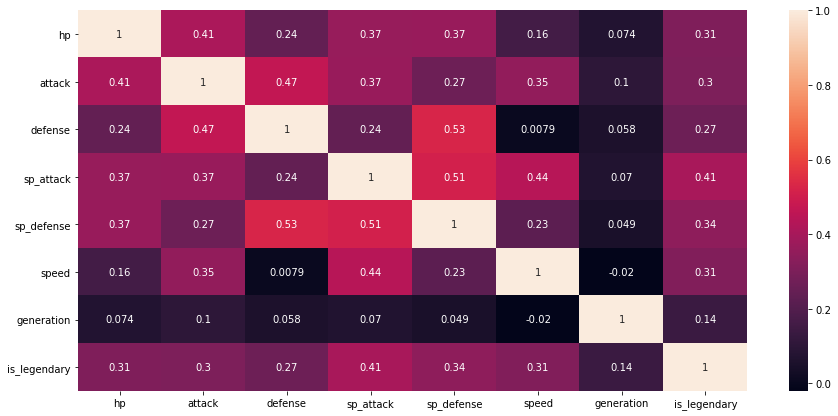

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True)

In [11]:
# plotting all the data

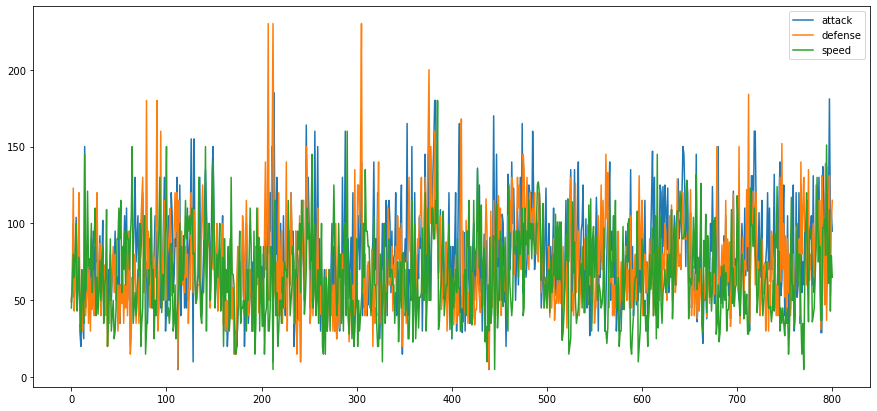

In [12]:
df3=df2.loc[:,['attack','defense','speed']]
df3.plot(figsize=(15,7))

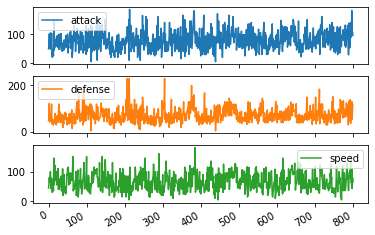

In [13]:
df3.plot(subplots=True)
plt.show()

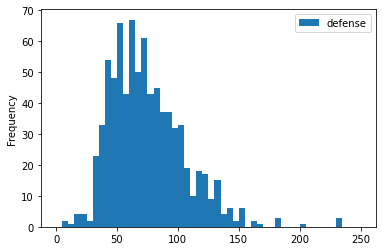

In [14]:
df2.plot(kind = "hist",y = "defense",bins = 50,range= (0,250))

# Building the model

In [15]:
features=['hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'generation']
X=df2[features]
y=df2.is_legendary
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [16]:
model=DecisionTreeClassifier(random_state=1)
model.fit(train_x,train_y)
pred=model.predict(test_x)

In [17]:
print("Mean absolute error: ",mean_absolute_error(test_y,pred))
print("Model score:",model.score(test_x,test_y))

Mean absolute error:  0.08955223880597014
Model score: 0.9104477611940298


In [18]:
my_submission=pd.DataFrame({'index':test_x.index,'isLegendary':pred})
my_submission.to_csv('submission.csv',index=False)

 If you have any suggestions on improving this notebook, please comment 